In [53]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from datahandler import testloader
from model import ConvNet


In [54]:
# load model
model_state = torch.load('model.pth')
model = ConvNet()
model.load_state_dict(model_state)

<All keys matched successfully>

In [55]:
# To visualize predictions
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap = 'Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

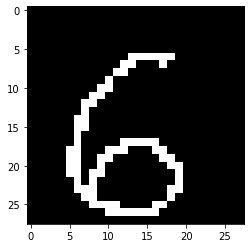

In [56]:
img = cv2.imread('images\\6.png')
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img = np.invert(img)

img = img/255
img = img.astype('float64')


plt.imshow(img, cmap="gray")


In [59]:

model.eval()

with torch.no_grad():
    log_soft = model(img.view(1, *img[0].shape))
ps = torch.exp(log_soft)
#view_classify(img, ps)
print(np.argmax(ps))

TypeError: conv2d() received an invalid combination of arguments - got (tuple, Parameter, Parameter, tuple, str, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!tuple!, !Parameter!, !Parameter!, !tuple!, !str!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!tuple!, !Parameter!, !Parameter!, !tuple!, str, !tuple!, int)
